In [3]:
import docx
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [15]:
import os

file_path = r"C:\Users\hp\OneDrive\Desktop\Resumes"
doc_file = []

# Iterate through folders in the directory
for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)  # Use os.path.join for proper path construction
    
    # Check if it's a directory before listi
    ng files
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.doc') or file.endswith('.docx'):  # Check for both '.doc' and '.docx' extensions
                doc_file.append(file)
    elif folder.endswith('.doc') or folder.endswith('.docx'):  # Handle standalone files directly in file_path
        doc_file.append(folder)

print(doc_file)


['Peoplesoft Admin_AnubhavSingh.docx', 'Peoplesoft Admin_G Ananda Rayudu.doc', 'Peoplesoft Admin_Gangareddy.doc', 'Peoplesoft Admin_Murali.docx', 'Peoplesoft Admin_Priyanka Ramadoss.doc', 'Peoplesoft Admin_SirazuddinMohammad.docx', 'Peoplesoft Admin_srinivasarao.doc', 'Peoplesoft Admin_Varkala Vikas.docx', 'Peoplesoft Admin_Vinod Akkala.doc', 'PeopleSoft DBA_Ganesh Alladi.doc', 'PeopleSoft DBA_Vivekanand Sayana.docx', 'Peoplesoft Finance_Arun Venu.doc', 'Peoplesoft Finance_Pritam Biswas.doc', 'Peoplesoft Finance_Rahul Ahuja.doc', 'Peoplesoft FSCM_HariNarayana.docx', 'Peoplesoft FSCM_Murali.docx', 'Peoplesoft FSCM_PriyabrataHota.docx', 'Peoplesoft FSCM_R Ahmed.doc', 'Peoplesoft FSCM_SUJATHA.docx', 'Resume_Subha Santosh_Peoplesoft FSCM.docx', 'Internship_Ravali_Musquare Technologies (1).docx', 'Internship_Susovan Bag_Musquare Technologies.docx', 'React Developer_Deepakreddy.docx', 'React Developer_Haripriya.docx', 'React Developer_Kamalakar Reddy.docx', 'React Developer_Naveen sadhu.docx

In [16]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 78 
Number of .pdf Files  = 0 
Number of .docx Files = 0


# Type of file format

In [17]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

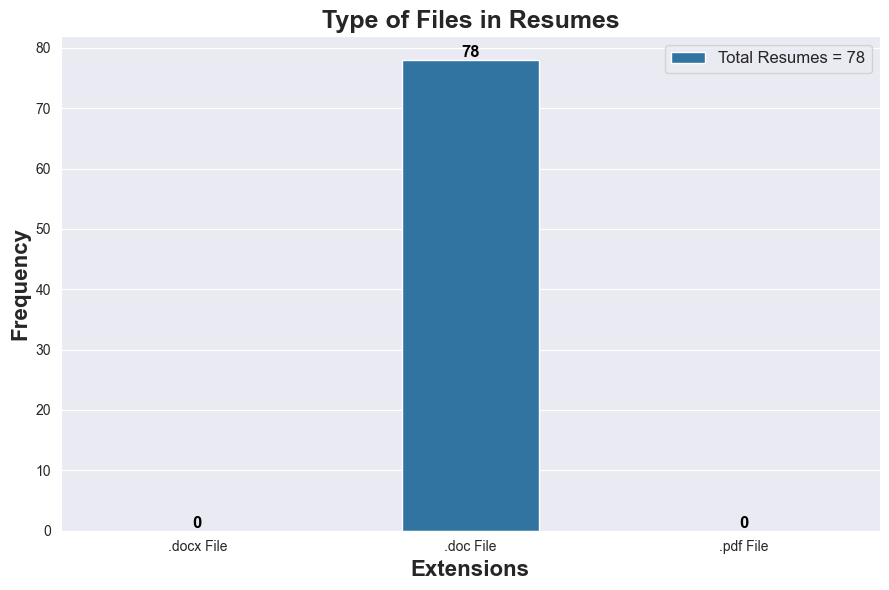

In [19]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig(r"C:\Users\hp\Downloads\DATA_SCIENCE_NOTES\noun_and_verb.png", dpi = 500)

# Extracting Resumes by profile category

In [21]:
file_path = r"C:\Users\hp\OneDrive\Desktop\Resumes"  # Base path
file_name = []
profile = []

# Iterate through items in the base directory
for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)  # Properly join paths
    
    # Check if the current item is a directory
    if os.path.isdir(folder_path):
        # Iterate through files in the subdirectory
        for file in os.listdir(folder_path):
            file_path_with_name = os.path.join(folder_path, file)  # Full file path
            if file.endswith('.doc') or file.endswith('.docx'):
                profile.append(folder)
                file_name.append(file)
    else:
        # Handle standalone files in the base directory
        if folder.endswith('.doc') or folder.endswith('.docx'):
            profile.append('BaseDirectory')  # Use a placeholder for files in the base directory
            file_name.append(folder)

print("Profiles:", profile)
print("File Names:", file_name)


Profiles: ['Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'Peoplesoft resumes', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'React Developer', 'SQL Developer Lightning insight', 'SQL Developer Lightning insight', 'SQL Developer Lightning insight', 'SQL De

In [22]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
73,workday resumes,Sri Krishna S_Hexaware.doc
74,workday resumes,Srikanth-Hexaware.docx
75,workday resumes,SSKumar_Hexaware.docx
76,workday resumes,Venkateswarlu B_Hexaware.doc


In [23]:
resume_data.Profile.value_counts().index

Index(['React Developer', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object', name='Profile')

In [24]:
resume_data.Profile.value_counts()

Profile
React Developer                    23
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: count, dtype: int64

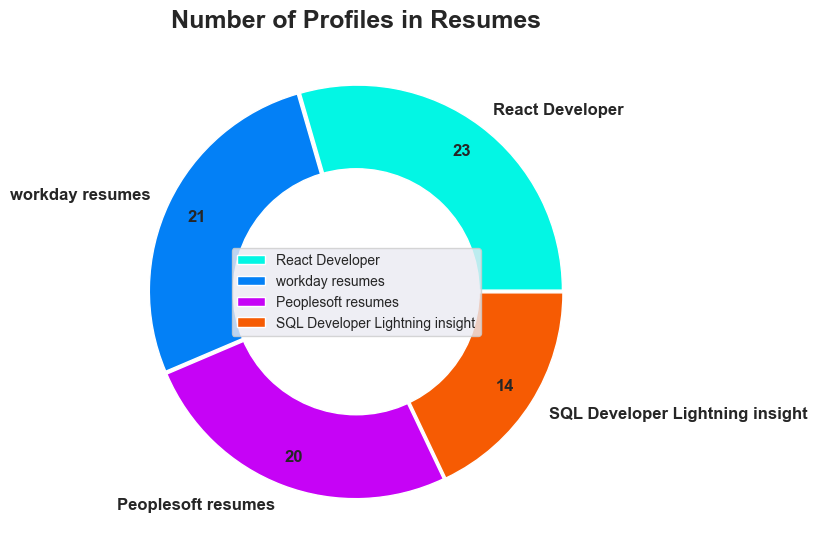

In [26]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig(r"C:\Users\hp\Downloads\DATA_SCIENCE_NOTES\noun_and_verb.png", dpi = 500)

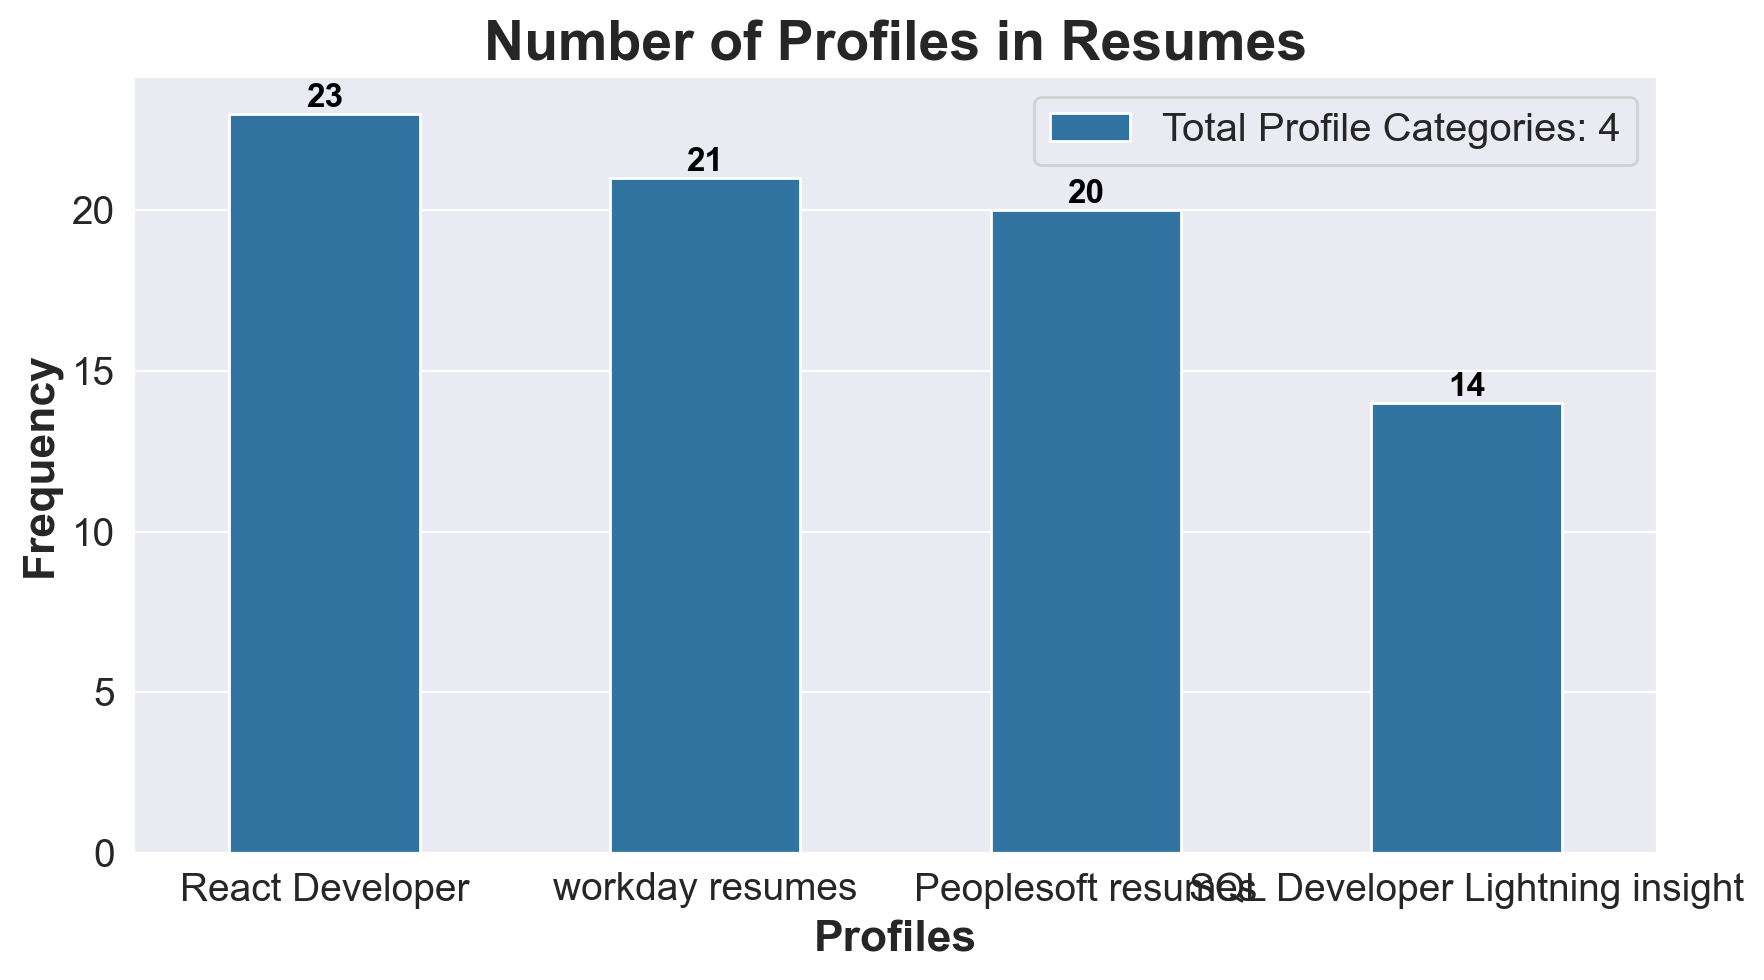

In [28]:
# Create the bar plot
fig, axe = plt.subplots(1, 1, figsize=(9, 5), dpi=200)
profile_counts = resume_data.Profile.value_counts()  # Calculate counts

# Plot using calculated x and y
ax = sns.barplot(
    x=profile_counts.index,
    y=profile_counts.values,
    ax=axe,
    width=0.5,
    label='Total Profile Categories: {}'.format(len(resume_data.Profile.unique()))
)

# Customize labels
axe.set_xlabel('Profiles', size=16, fontweight='bold')
axe.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='best', fontsize='x-large')
plt.title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, color='black', fontweight='bold', fontsize=12)

# Adjust layout and save the figure
fig.tight_layout()
plt.show()
fig.savefig(r"C:\Users\hp\Downloads\DATA_SCIENCE_NOTES\noun_and_verb.png", dpi=500)


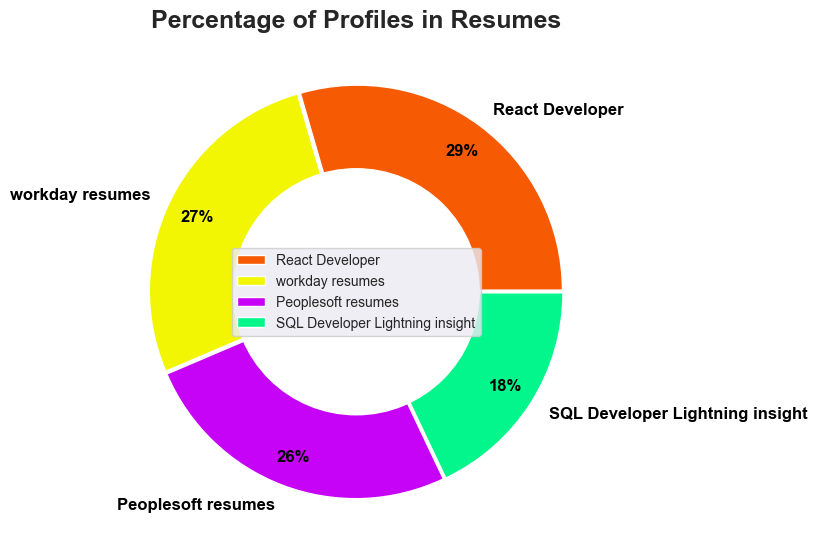

In [30]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig(r"C:\Users\hp\Downloads\DATA_SCIENCE_NOTES\noun_and_verb.png", dpi = 500)

In [32]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx(r"C:\Users\hp\OneDrive\Desktop\Resumes\React Developer\React Developer_Haripriya.docx"))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

# Data_Exploration

In [33]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category1,Category2,Category3,Category4,Category,Resume_Details
0,PeopleSoft,NaN,NaN,NaN,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,NaN,NaN,NaN,PeopleSoft,murali experience summary years experience wor...
2,PeopleSoft,NaN,NaN,NaN,PeopleSoft,profile summary overall years experience peopl...
3,PeopleSoft,NaN,NaN,NaN,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,NaN,NaN,NaN,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,NaN,NaN,NaN,PeopleSoft,years experience peoplesoft application enhanc...
6,PeopleSoft,NaN,NaN,NaN,PeopleSoft,years experience peoplesoft application enhanc...
7,PeopleSoft,NaN,NaN,NaN,PeopleSoft,career objective pursuing peoplesoft executive...
8,PeopleSoft,NaN,NaN,NaN,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,NaN,NaN,NaN,PeopleSoft,address manyata tech park nagavara bangalore l...


# N-grams

In [34]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['murali']),
 WordList(['experience']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['working']),
 WordList(['peoplesoft']),
 WordList(['administration']),
 WordList(['performing']),
 WordList(['various']),
 WordList(['infrastructure']),
 WordList(['related']),
 WordList(['activities']),
 WordList(['peoplesoft']),
 WordList(['environments']),
 WordList(['installed']),
 WordList(['configured']),
 WordList(['peoplesoft']),
 WordList(['web']),
 WordList(['server'])]

In [35]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['murali', 'experience']),
 WordList(['experience', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'working']),
 WordList(['working', 'peoplesoft']),
 WordList(['peoplesoft', 'administration']),
 WordList(['administration', 'performing']),
 WordList(['performing', 'various']),
 WordList(['various', 'infrastructure']),
 WordList(['infrastructure', 'related']),
 WordList(['related', 'activities']),
 WordList(['activities', 'peoplesoft']),
 WordList(['peoplesoft', 'environments']),
 WordList(['environments', 'installed']),
 WordList(['installed', 'configured']),
 WordList(['configured', 'peoplesoft']),
 WordList(['peoplesoft', 'web']),
 WordList(['web', 'server']),
 WordList(['server', 'application'])]

In [36]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['murali', 'experience', 'summary']),
 WordList(['experience', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'working']),
 WordList(['experience', 'working', 'peoplesoft']),
 WordList(['working', 'peoplesoft', 'administration']),
 WordList(['peoplesoft', 'administration', 'performing']),
 WordList(['administration', 'performing', 'various']),
 WordList(['performing', 'various', 'infrastructure']),
 WordList(['various', 'infrastructure', 'related']),
 WordList(['infrastructure', 'related', 'activities']),
 WordList(['related', 'activities', 'peoplesoft']),
 WordList(['activities', 'peoplesoft', 'environments']),
 WordList(['peoplesoft', 'environments', 'installed']),
 WordList(['environments', 'installed', 'configured']),
 WordList(['installed', 'configured', 'peoplesoft']),
 WordList(['configured', 'peoplesoft', 'web']),
 WordList(['peoplesoft', 'web', 'server']),
 WordList(['web', 'server', 'application']),
 WordList([

In [37]:
resume_data['Resume_Details']

0     anubhav kumar singh work globally competitive ...
1     murali experience summary years experience wor...
2     profile summary overall years experience peopl...
3     peoplesoft admin varkala vikas career objectiv...
4     peoplesoft administration vivekanand sayana ca...
5     years experience peoplesoft application enhanc...
6     years experience peoplesoft application enhanc...
7     career objective pursuing peoplesoft executive...
8     tanna sujatha objective seeking challenging ro...
9     address manyata tech park nagavara bangalore l...
10    name ravali curriculum vitae specialization co...
11    susovan bag seeking challenging position field...
12    kanumuru deepak reddy career objective secure ...
13    haripriya battina experience developer reactjs...
14    kamalakar reddy linked professional summary ye...
15    naveen sadhu title software developer location...
16    pragnya pattnaik expertise around years experi...
17    sri geethika prestige road number bandari 

# Top 20 most used words in Resume

In [38]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [39]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,309,experience
1,241,using
2,194,workday
3,186,application
4,178,sql
5,168,server
6,168,project
7,167,data
8,164,reports
9,156,peoplesoft


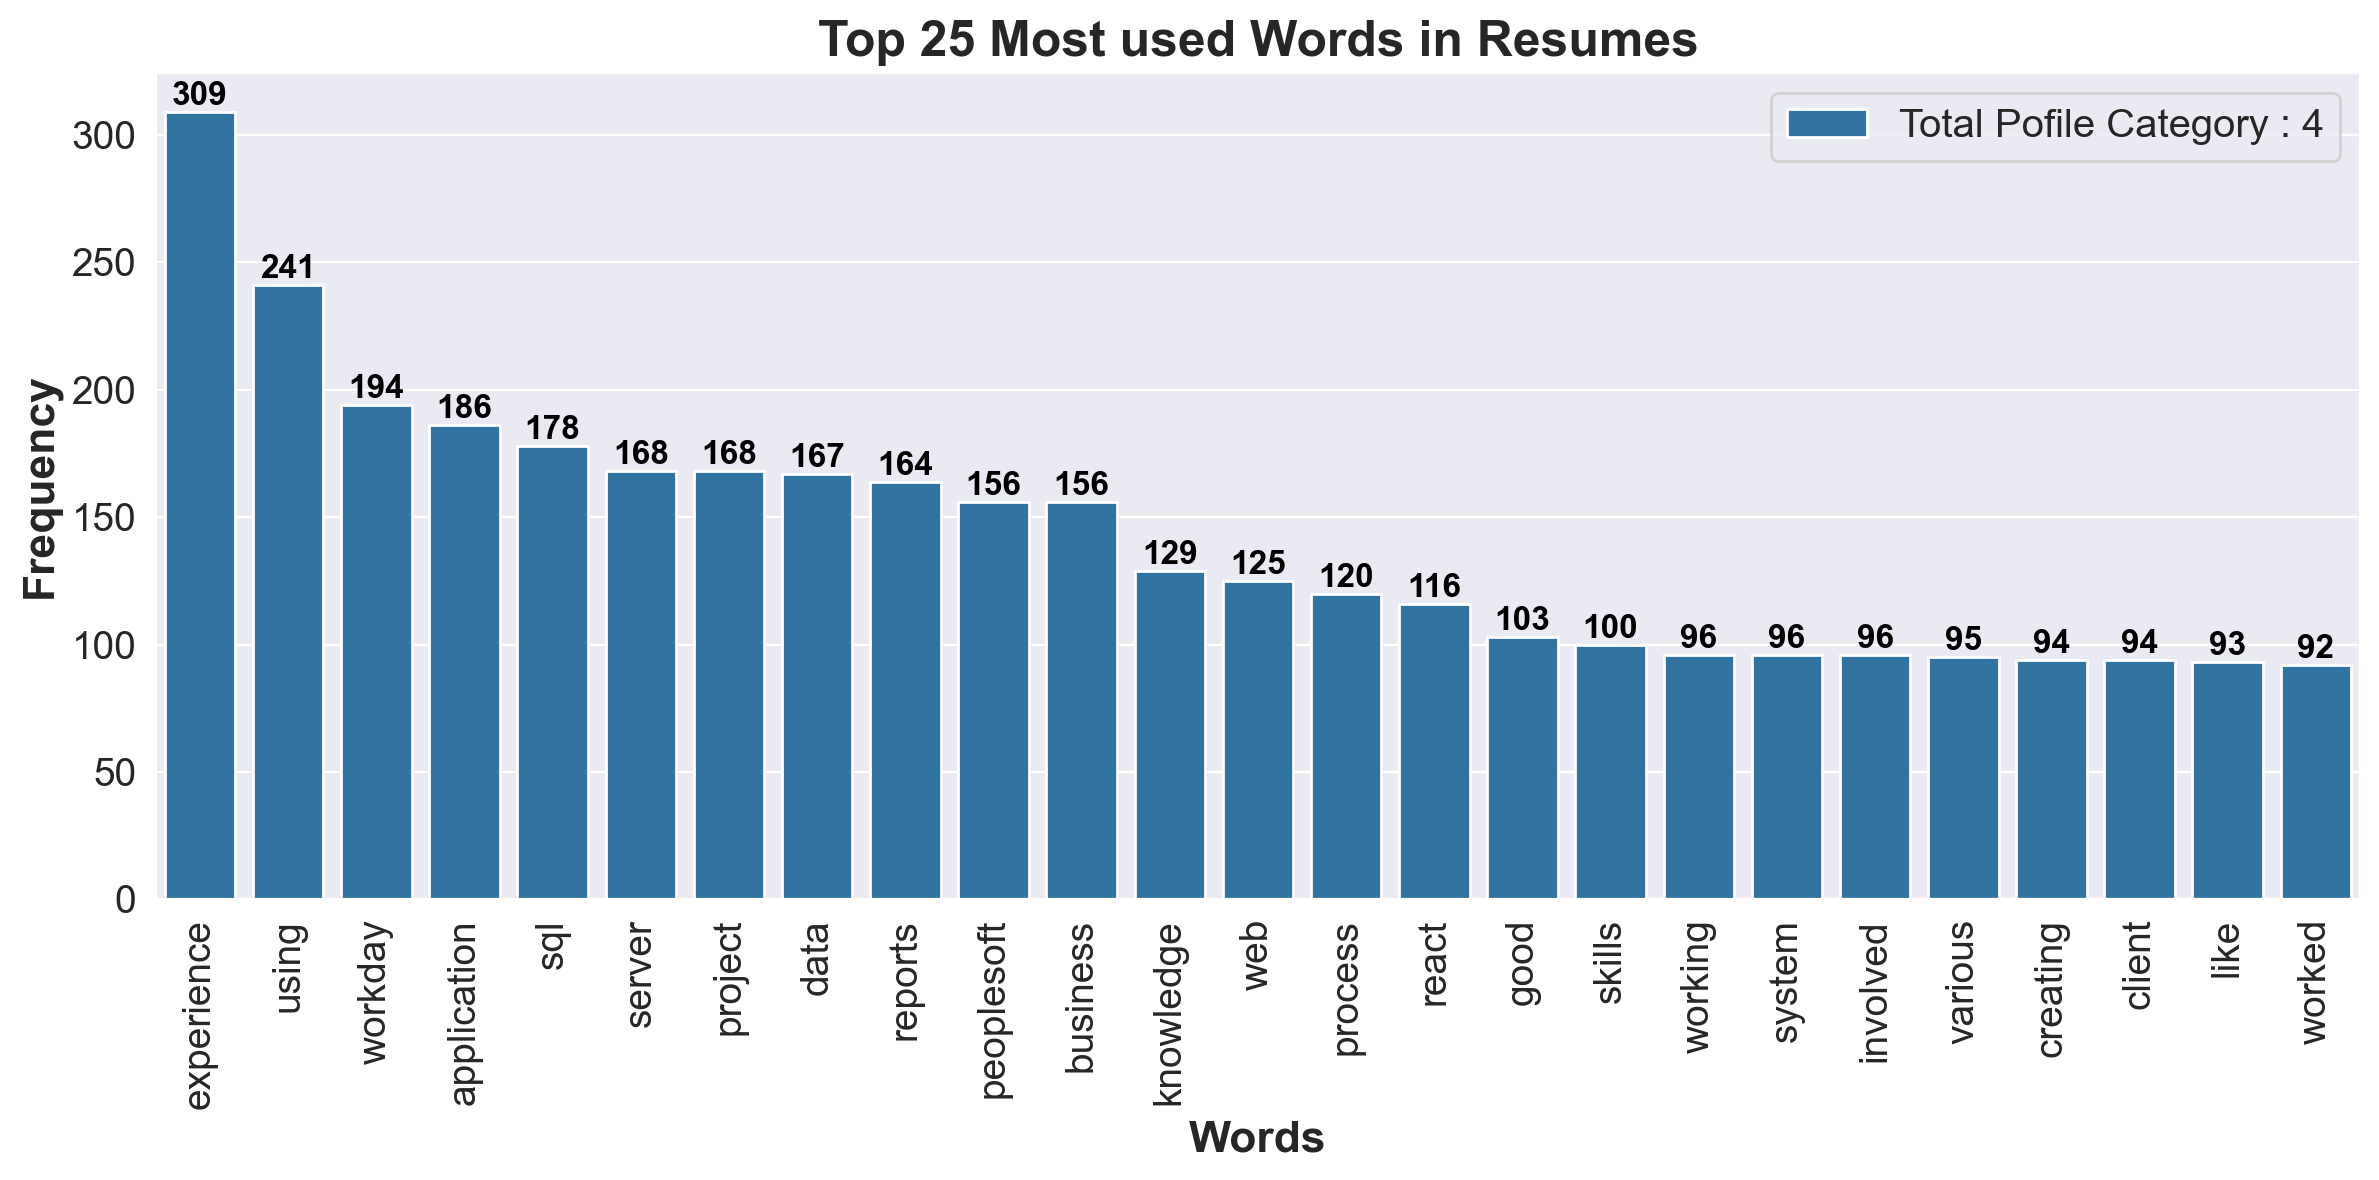

In [40]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig(r"C:\Users\hp\Downloads\DATA_SCIENCE_NOTES\noun_and_verb.png", dpi = 500)

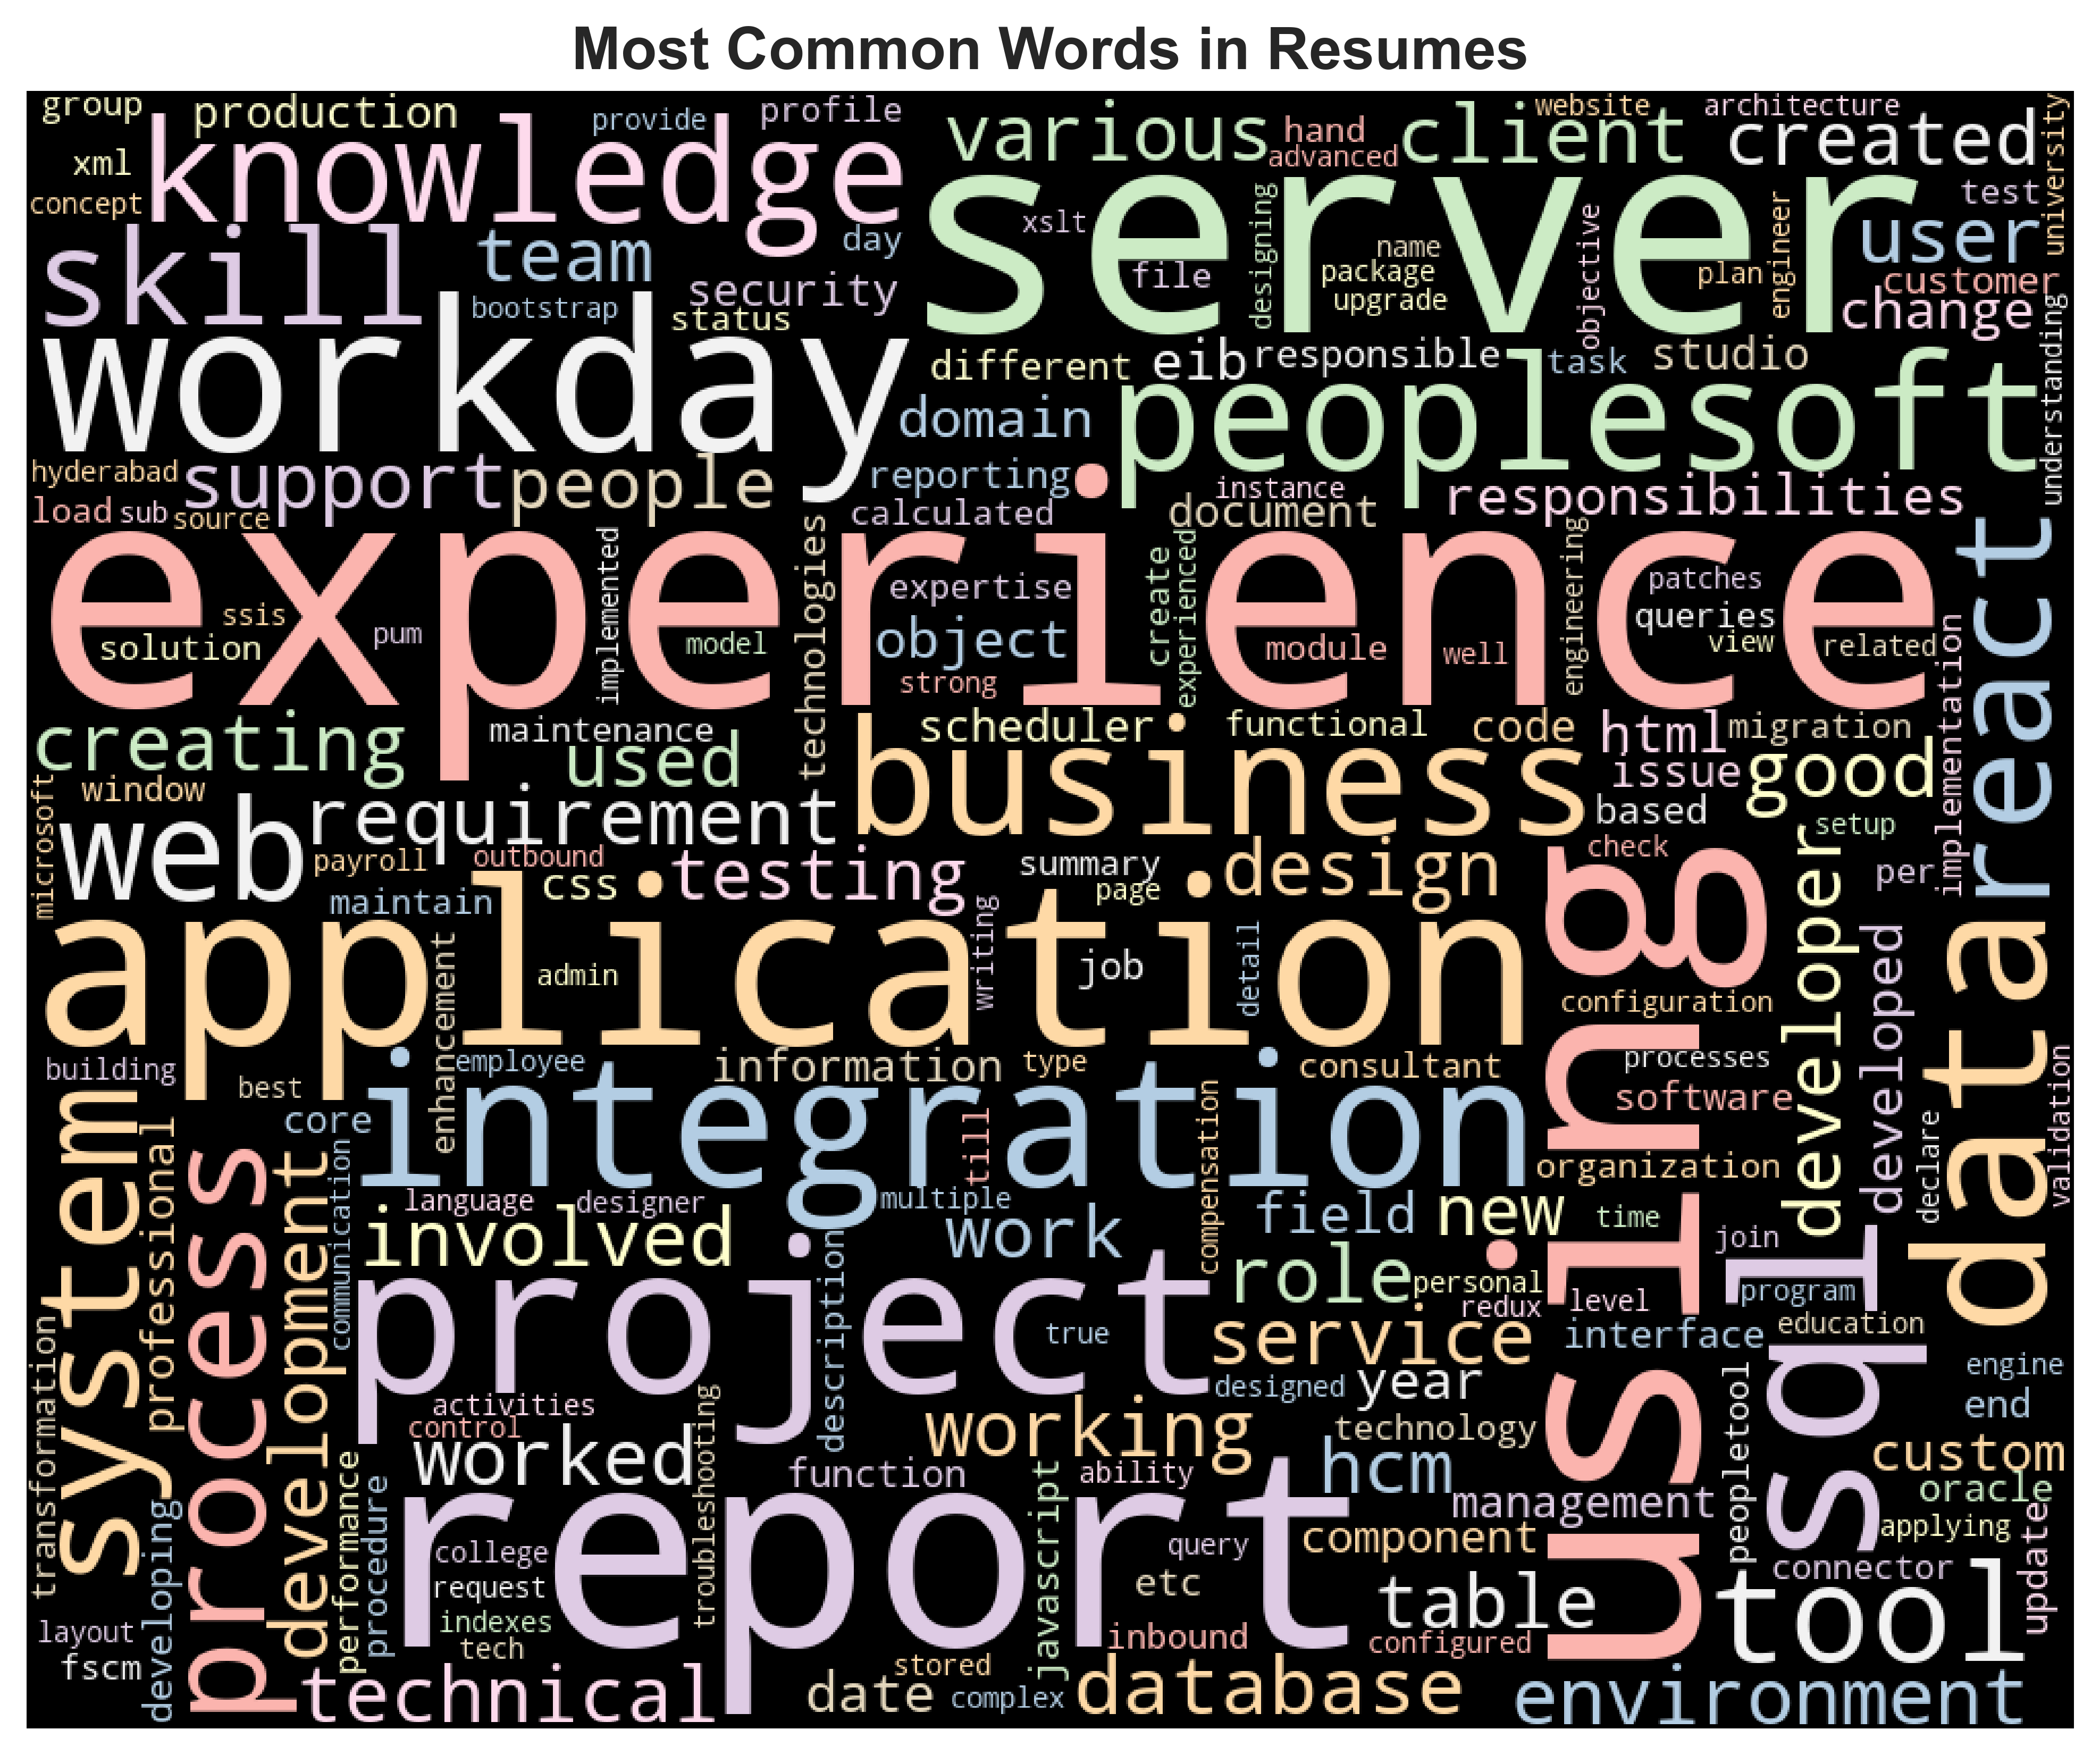

In [41]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file(r"C:\Users\hp\Downloads\DATA_SCIENCE_NOTES\noun_and_verb.png")
plt.show()